In [56]:
!pip install ipywidgets

import pandas as pd
import pandas_profiling as pp

import numpy as np
df = pd.read_csv('Baltimore911.csv')
#preprocessing the data

#remove column with constant value:
del df["Total Incidents"]
del df["Location 1"]
del df["vri_name1"]

#removing instances of null data
print('Number of rows in original data = %d' % (df.shape[0]))

df = df.dropna()  # what does this line do? 
print('Number of rows after discarding missing values = %d' % (df.shape[0]))

#removing instances of "inside" and "outside", replacing them with "I" and "O" respectively
column_to_replace = 'Inside/Outside'
value_to_replace = 'Inside'
replacement_value = 'I'

df[column_to_replace] = df[column_to_replace].replace(value_to_replace, replacement_value)


# Specify the column and values to replace
column_to_replace = 'Inside/Outside'
value_to_replace = 'Outside'
replacement_value = 'O'

df[column_to_replace] = df[column_to_replace].replace(value_to_replace, replacement_value)


#removing duplicate data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))


print('Number of rows before discarding duplicates = %d' % (df.shape[0]))
df = df.drop_duplicates()
print('Number of rows after discarding duplicates = %d' % (df.shape[0]))


#Create A new .csv from the cleaned data frame
output_file = 'Baltimore911_Preprocessed.csv'

df.to_csv(output_file, index=False)

C:\Users\thadd\AppData\Local\Temp\ipykernel_6004\2917432795.py:7: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Baltimore911.csv')


Number of rows in original data = 292761
Number of rows after discarding missing values = 51610
Number of duplicate rows = 4584
Number of rows before discarding duplicates = 51610
Number of rows after discarding duplicates = 47026


In [57]:


#generate the data profile report

df = pd.read_csv('Baltimore911_Preprocessed.csv')

df.profile_report()


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

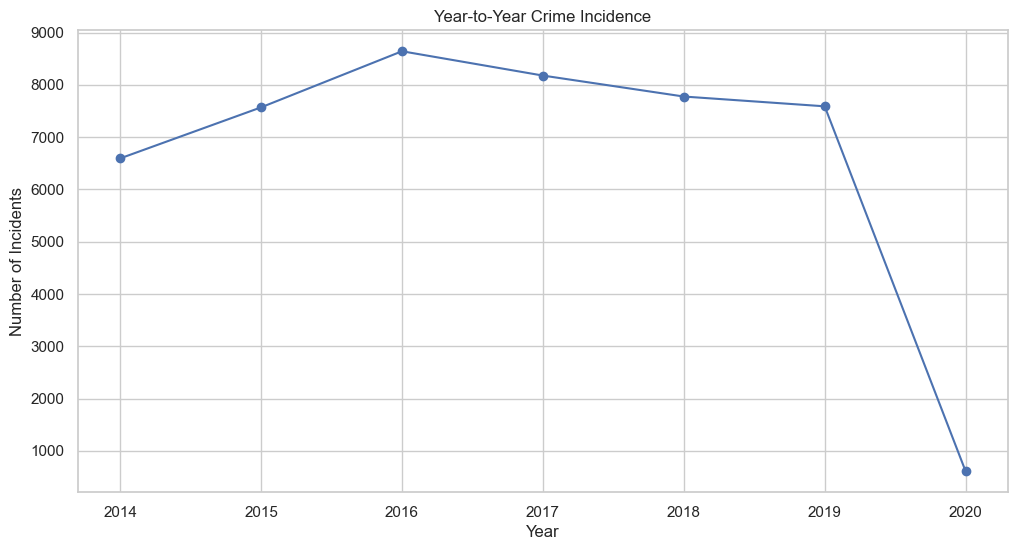

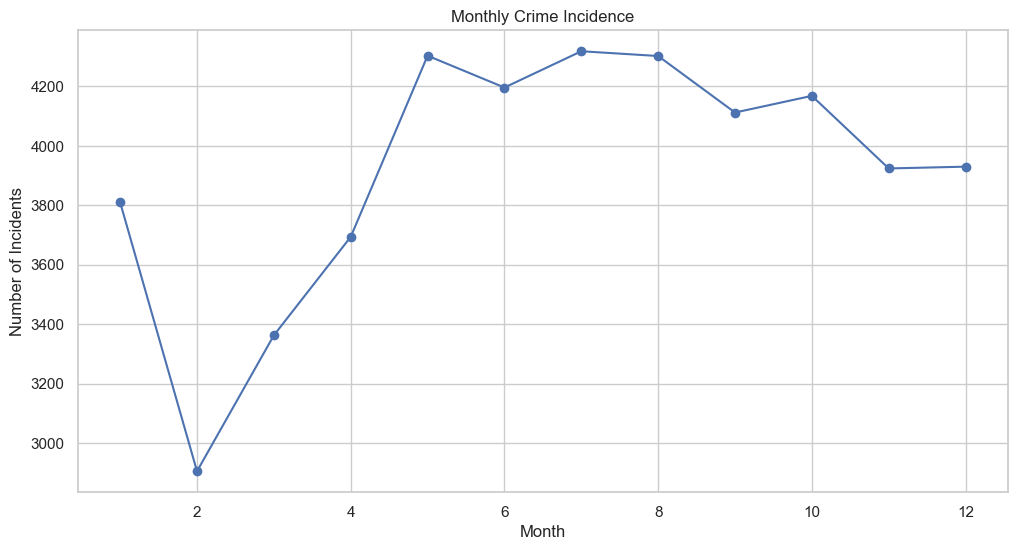

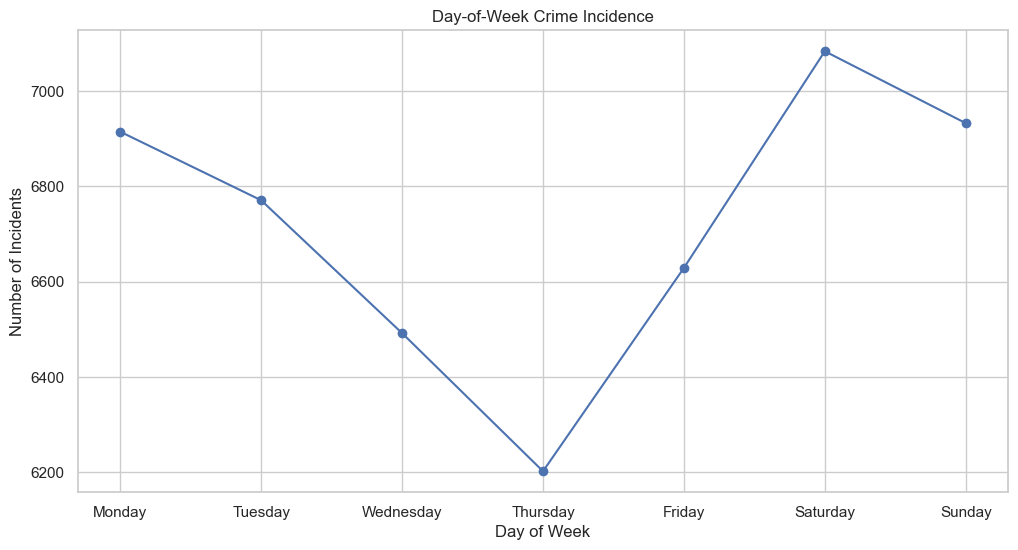

" - test barcharts\n# Plot the year-to-year crime stats\nplt.figure(figsize=(12, 6))\nsns.countplot(x='year', data=df_filtered)\nplt.title('Year-to-Year Crime Incidence')\nplt.xlabel('Year')\nplt.ylabel('Number of Crimes')\nplt.show()\n\n# Plot the monthly crime stats\nplt.figure(figsize=(12, 6))\nsns.countplot(x='month', data=df)\nplt.title('Monthly Crime Incidence')\nplt.xlabel('Month')\nplt.ylabel('Number of Crimes')\nplt.show()\n\n# Plot the day-of-week crime stats\nplt.figure(figsize=(12, 6))\nsns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])\nplt.title('Day-of-Week Crime Incidence')\nplt.xlabel('Day of Week')\nplt.ylabel('Number of Crimes')\nplt.show()\n"

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Assuming your dataset has a 'CrimeDate' column in date and time format
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], format='%m/%d/%Y')

# Extract year, month, and day from CrimeDate
df['year'] = df['CrimeDate'].dt.year
df['month'] = df['CrimeDate'].dt.month
df['day_of_week'] = df['CrimeDate'].dt.day_name()

#limit year to 2014 and above
df_filtered = df[df['year'] >= 2014]


# Plot year-to-year crime (row count)
plt.figure(figsize=(12, 6))
df_filtered.groupby('year').size().plot(marker='o')
plt.title('Year-to-Year Crime Incidence')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

# Plot monthly crime (using row count)
plt.figure(figsize=(12, 6))
df.groupby('month').size().plot(marker='o')
plt.title('Monthly Crime Incidence')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()

# Plot day-of-week crime (row count)
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 6))
df.groupby('day_of_week').size().reindex(day_of_week_order).plot(marker='o')
plt.title('Day-of-Week Crime Incidence')
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.show()


""" - test barcharts
# Plot the year-to-year crime stats
plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=df_filtered)
plt.title('Year-to-Year Crime Incidence')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.show()

# Plot the monthly crime stats
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=df)
plt.title('Monthly Crime Incidence')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.show()

# Plot the day-of-week crime stats
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_week', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Day-of-Week Crime Incidence')
plt.xlabel('Day of Week')
plt.ylabel('Number of Crimes')
plt.show()
"""


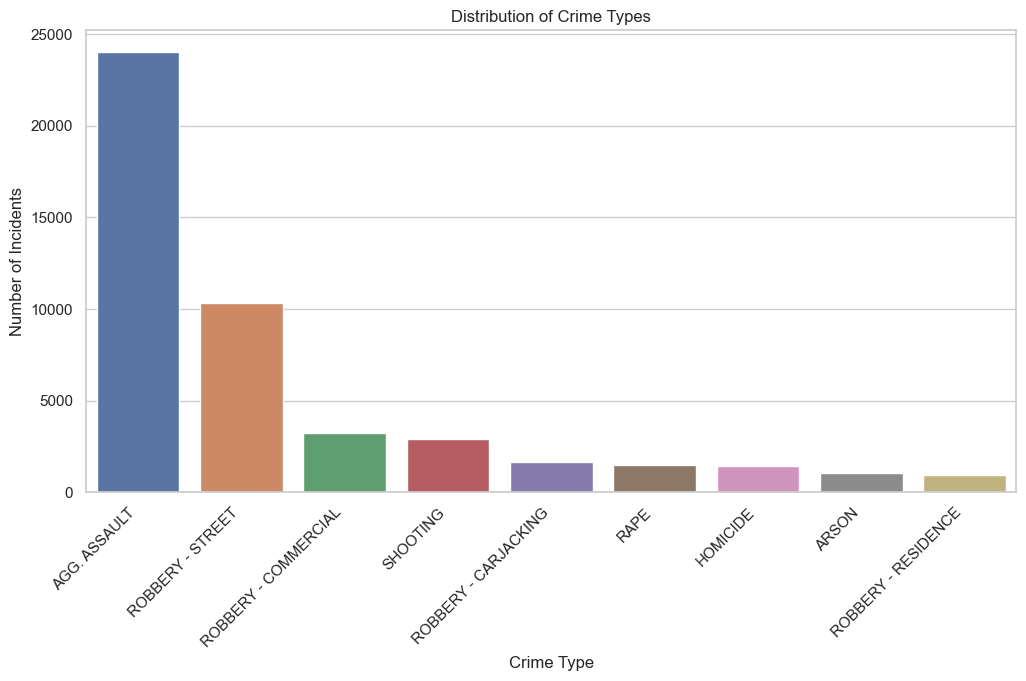

In [59]:
#Crime type b
crime_type_counts = df['Description'].value_counts()

# Plot the distribution of crime types using the description category
plt.figure(figsize=(12, 6))
sns.barplot(x=crime_type_counts.index, y=crime_type_counts.values)
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


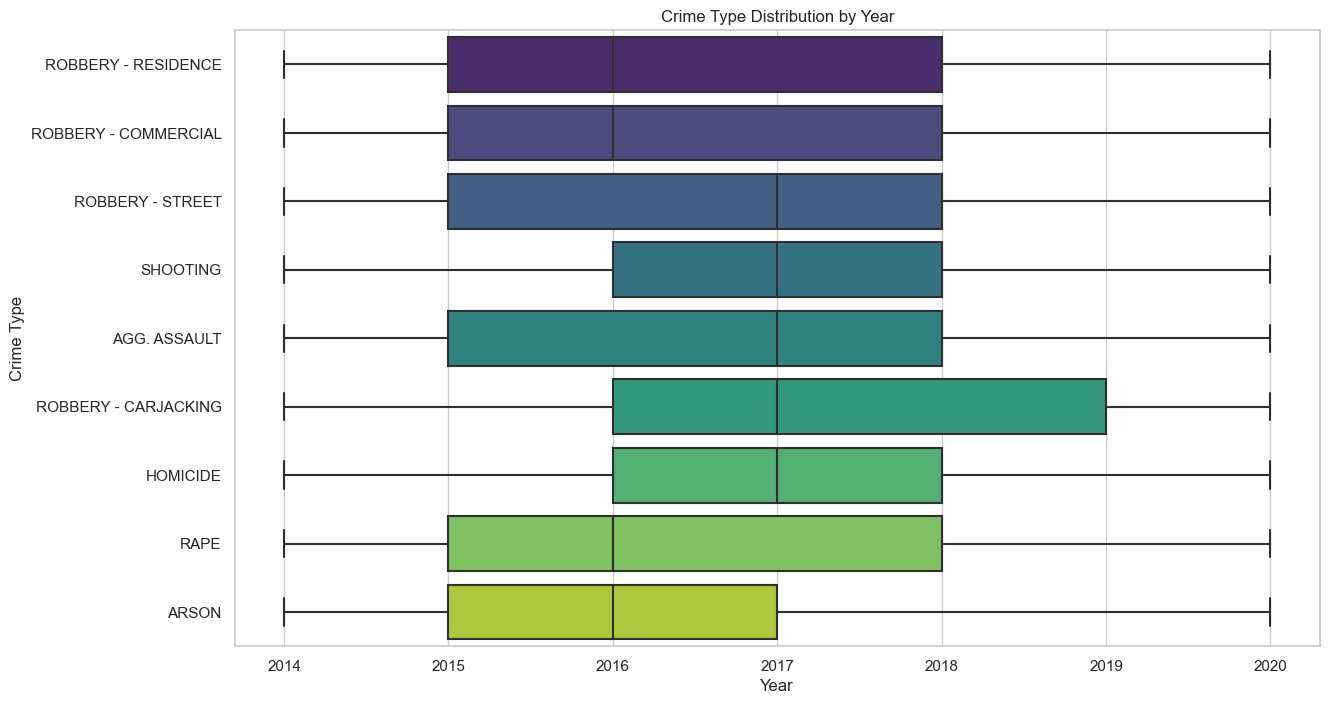

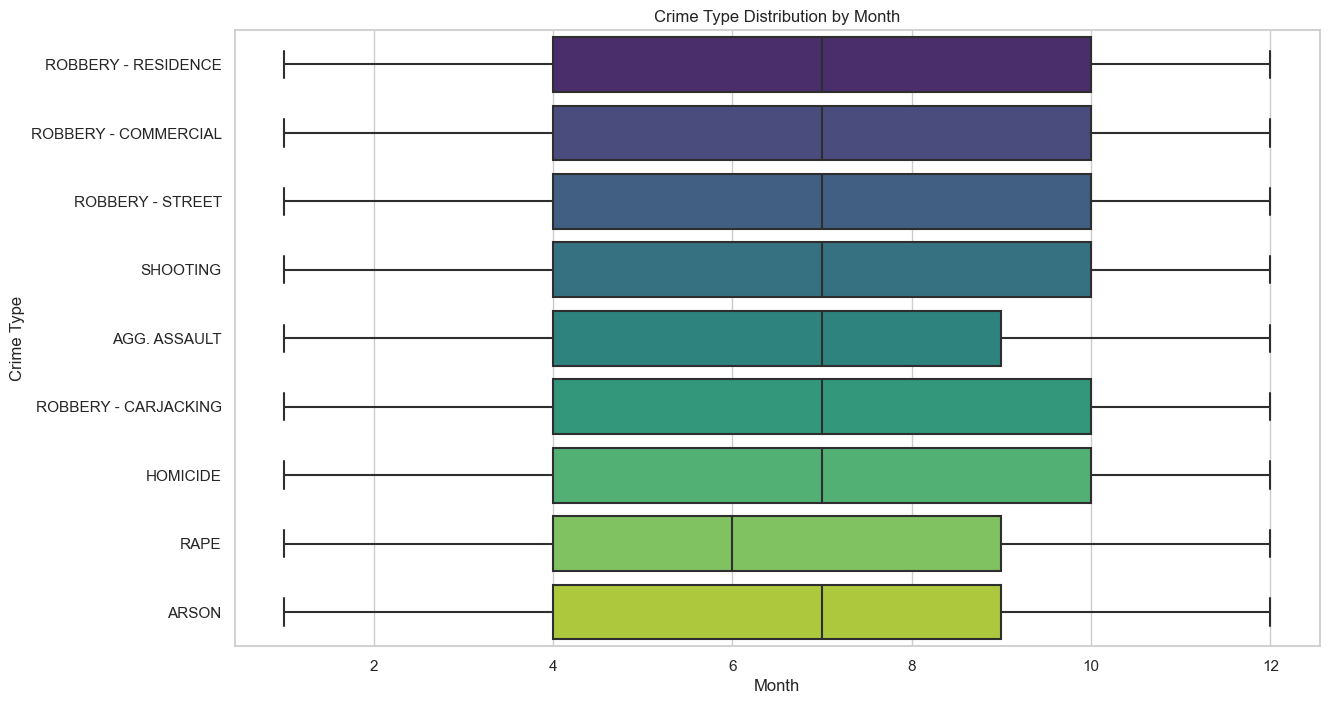

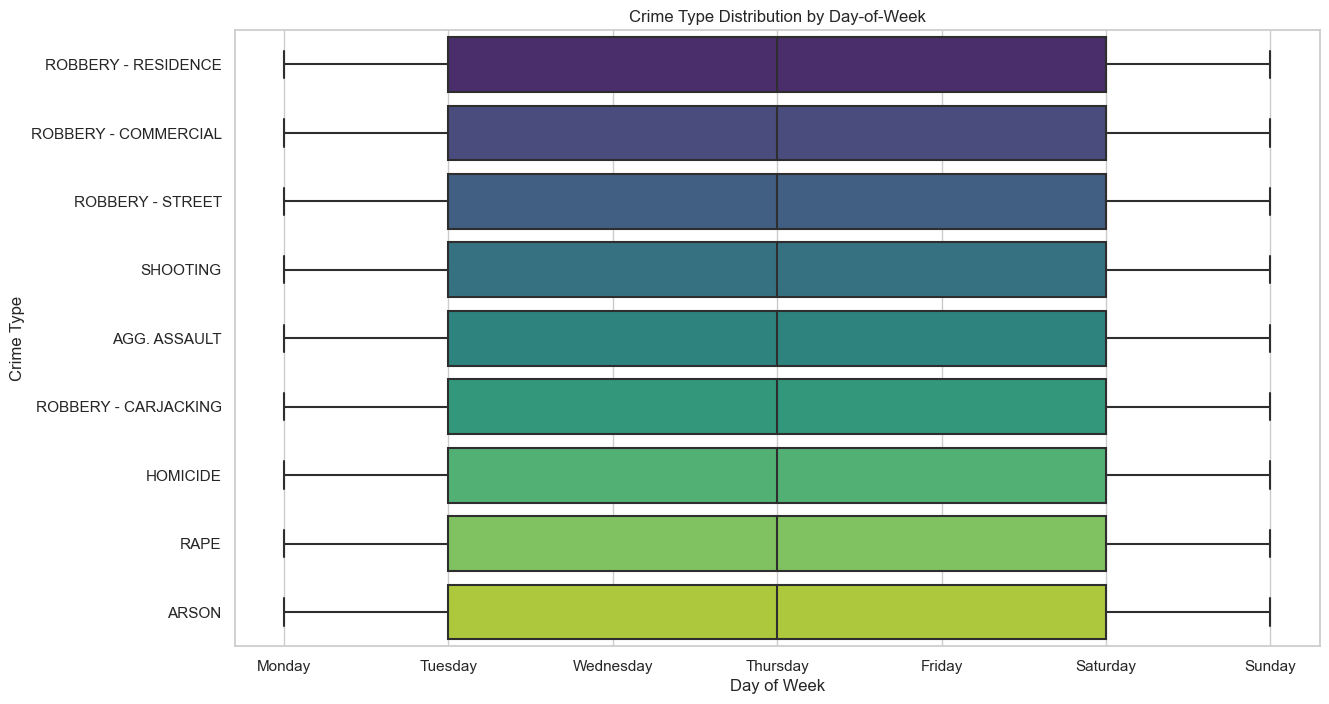

" - test bar charts\n# Plotting crime type distributions by year\nplt.figure(figsize=(16, 6))\nsns.countplot(x='year', hue='Description', data=df_filtered)\nplt.title('Crime Type Distribution by Year')\nplt.xlabel('Year')\nplt.ylabel('Number of Incidents')\nplt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')\nplt.show()\n\n# Plotting crime type distributions by month\nplt.figure(figsize=(16, 6))\nsns.countplot(x='month', hue='Description', data=df)\nplt.title('Crime Type Distribution by Month')\nplt.xlabel('Month')\nplt.ylabel('Number of Incidents')\nplt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')\nplt.show()\n\n# Plotting crime type distributions by day of week\nplt.figure(figsize=(16, 6))\nsns.countplot(x='day_of_week', hue='Description', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])\nplt.title('Crime Type Distribution by Day of Week')\nplt.xlabel('Day of Week')\nplt.ylabel('Number of I

In [60]:

df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], format='%m/%d/%Y')

# Extract year, month, and day of week from the date
df['year'] = df['CrimeDate'].dt.year
df['month'] = df['CrimeDate'].dt.month
df['day_of_week'] = df['CrimeDate'].dt.day_name()

#filter data frame, starting year at 2014
df_filtered = df[df['year'] >= 2014]

# Crime type distributions from year-to-year using box plots
plt.figure(figsize=(14, 8))
sns.boxplot(x='year', y='Description', data=df_filtered, palette='viridis')
plt.title('Crime Type Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Crime Type')
plt.show()

# crime type distributions from month-to-month using box plots
plt.figure(figsize=(14, 8))
sns.boxplot(x='month', y='Description', data=df, palette='viridis')
plt.title('Crime Type Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Crime Type')
plt.show()

# Map day names to numeric values to avoid type error when using boxplot
day_name_to_number = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df['day_of_week'] = df['day_of_week'].map(day_name_to_number)

# Plot crime type distributions by day-of-week using box plots
plt.figure(figsize=(14, 8))
sns.boxplot(x='day_of_week', y='Description', data=df, palette='viridis')
plt.title('Crime Type Distribution by Day-of-Week')
plt.xlabel('Day of Week')
plt.ylabel('Crime Type')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

""" - test bar charts
# Plotting crime type distributions by year
plt.figure(figsize=(16, 6))
sns.countplot(x='year', hue='Description', data=df_filtered)
plt.title('Crime Type Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plotting crime type distributions by month
plt.figure(figsize=(16, 6))
sns.countplot(x='month', hue='Description', data=df)
plt.title('Crime Type Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Plotting crime type distributions by day of week
plt.figure(figsize=(16, 6))
sns.countplot(x='day_of_week', hue='Description', data=df, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Crime Type Distribution by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Incidents')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
"""


In [ ]:
!pip install pandas plotly dash

import pandas as pd
import plotly.express as px
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output


# Assuming your dataset has a 'latitude', 'longitude', 'CrimeDate', and 'crime_type' column
# If your column names are different, replace them accordingly

# Convert 'CrimeDate' column to datetime format
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], format='%m/%d/%Y')

# Extract year, month, and day of week from the CrimeDate
df['year'] = df['CrimeDate'].dt.year
df['month'] = df['CrimeDate'].dt.month
df['day_of_week'] = df['CrimeDate'].dt.day_name()

# Create a Dash web application
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1("Crime Exploration Dashboard"),

    # Scatter plot for spatial exploration
    dcc.Graph(id='scatter-plot', figure={}),

    # Line plot for temporal exploration
    dcc.Graph(id='line-plot', figure={}),

    # Dropdown for selecting crime type
    dcc.Dropdown(
        id='crime-type-dropdown',
        options=[{'label': crime_type, 'value': crime_type} for crime_type in df['crime_type'].unique()],
        value=df['crime_type'].unique()[0],
        multi=False,
        style={'width': '50%'}
    )
])

# Callback to update the scatter plot based on crime type
@app.callback(
    Output('scatter-plot', 'figure'),
    [Input('crime-type-dropdown', 'value')]
)
def update_scatter_plot(selected_crime_type):
    filtered_df = df[df['Description'] == selected_crime_type]
    fig = px.scatter_mapbox(filtered_df, 
                            lat='Latitude', 
                            lon='Longitude', 
                            color='Description',
                            hover_name='Description',
                            zoom=10,
                            mapbox_style="open-street-map")
    return fig

# Callback to update the line plot based on crime type
@app.callback(
    Output('line-plot', 'figure'),
    [Input('crime-type-dropdown', 'value')]
)
def update_line_plot(selected_crime_type):
    crime_counts = df[df['crime_type'] == selected_crime_type].groupby('year').size().reset_index(name='count')
    fig = px.line(crime_counts, x='year', y='count', markers=True, title='Crime Incidence Over Years')
    return fig

# Run the Dash web application
if __name__ == '__main__':
    app.run_server(debug=True)


In [82]:
import pandas as pd
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact

# Assuming your dataset has 'latitude', 'longitude', 'date', and 'Depscription' columns
# If your column names are different, replace them accordingly

# Convert 'CrimeDate' column to datetime format
df['CrimeDate'] = pd.to_datetime(df['CrimeDate'], format='%m/%d/%Y')

# Extract year, month, and day of week from the CrimeDate
df['year'] = df['CrimeDate'].dt.year
df['month'] = df['CrimeDate'].dt.month
df['day_of_week'] = df['CrimeDate'].dt.day_name()

import plotly.graph_objs as go

def plot_map(crime_type, year):
    filtered_df = df[(df['Description'] == crime_type) & (df['year'] == year)]
    
    # Create a scatter mapbox figure
    fig = go.Figure(go.Scattermapbox(
        lat=filtered_df['Latitude'],
        lon=filtered_df['Longitude'],
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=9,
            color=filtered_df['Description'],
            showscale=True,
            colorscale='Viridis',
            cmin=0,
            cmax=len(filtered_df['Description'].unique())
        ),
        text=filtered_df['Description']
    ))
    
    # Set mapbox layout
    fig.update_layout(
        mapbox=dict(
            style="open-street-map",
            center=dict(lat=filtered_df['Latitude'].mean(), lon=filtered_df['Longitude'].mean()),
            zoom=10
        )
    )
    
    return fig

def plot_line(crime_type, temporal_attribute):
    if temporal_attribute == 'Year':
        counts = df[df['Description'] == crime_type].groupby('year').size().reset_index(name='count')
    elif temporal_attribute == 'Month':
        counts = df[df['Description'] == crime_type].groupby('month').size().reset_index(name='count')
    elif temporal_attribute == 'Day of Week':
        counts = df[df['Description'] == crime_type].groupby('day_of_week').size().reset_index(name='count')
        counts['day_of_week'] = pd.Categorical(counts['day_of_week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
        counts = counts.sort_values('day_of_week')
    else:
        raise ValueError("Invalid temporal attribute")

    # Create a line plot figure
    fig = go.Figure(go.Scatter(
        x=counts[temporal_attribute],
        y=counts['count'],
        mode='lines+markers'
    ))

    # Set plot layout
    fig.update_layout(
        title=f'{temporal_attribute}ly Crime Incidence for {crime_type}',
        xaxis=dict(title=temporal_attribute),
        yaxis=dict(title='Number of Incidents')
    )

    return fig


# Create interactive widgets
crime_type_widget = widgets.Dropdown(options=df['Description'].unique(), value=df['Description'].unique()[0], description='Crime Type:')
year_widget = widgets.IntSlider(min=df['year'].min(), max=df['year'].max(), value=df['year'].min(), description='Year:')
temporal_attribute_widget = widgets.Dropdown(options=['Year', 'Month', 'Day of Week'], value='Year', description='Temporal Attribute:')

# Create interactive plots
@interact
def update_map_and_line_plots(crime_type=crime_type_widget, year=year_widget, temporal_attribute=temporal_attribute_widget):
    fig_map = plot_map(crime_type, year)
    fig_line = plot_line(crime_type, temporal_attribute)

    # Display the map and line plots side by side
    widgets.VBox([widgets.HBox([widgets.Output(), widgets.Output()]), fig_map, fig_line])


KeyError: 'Year'

interactive(children=(Dropdown(description='Crime Type:', options=('ROBBERY - RESIDENCE', 'ROBBERY - COMMERCIA…